name: Fluent Python
description: Some test description about the blog
tags: Project
date: 2022-12-13
published: false

# Contents:

- [Python Data Model](#python-data-model)
   - [How These Methods Are Used](#how-these-methods-are-used)
   - [Numeric Types](#numeric-types)

# Python Data Model <a class="anchor" id="python-data-model"></a>

The Python Data Model could be thought of as the description of Python as a framework. Formalizing the interfaces of the blocks that make up the language. When we create new classes we use the interpreter to invoke these special interfaces (methods) to perform basic object operations. These methods are normally created with a special syntax known as the Dunder syntax, a shortcut for double underscore before and after.

The example below is a very simple demonstration of how we can implement two of these special methods `__getitem__` and `__len__`.

In [5]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
  ranks = [str(n) for n in range(2, 11)] + list('JQKA')
  suits = 'spades dimonds clubs hearts'.split()

  def __init__(self):
    self._cards = [Card(rank, suit) for suit in self.suits
                                    for rank in self.ranks]

  def __len__(self):
    return len(self._cards)

  def __getitem__(self, position):
    return self._cards[position]

Just like every collection in Python the custom class can respond to the `len()` function within code. We have modified what the length should be printed out by writing our own implementation that returns the number of items in our deck list.

In [6]:
deck = FrenchDeck()
len(deck)

52

Likewise when it comes to reading specific cards from the deck, as we have updated the implementation of the `__getitem__` function we can easily print out the card given a specific position.

In [7]:
deck[0]

Card(rank='2', suit='spades')

The power of the Python Data Model comes from this ability to write custom implementations of these special methods. Users do not need to write getter and setters for instance to retrieve the length of the collection. Likewise writing these methods based on the data model allows us to make use of the powerful internal tools within the Python language.

Instead of writing a function within the class to retrieve a random card from the deck we can use Pythons built in `random.choice(deck)` function. This removes alot of boilerplate code having to be written.

## How These Methods Are Used <a class="anchor" id="how-these-methods-are-used"></a>

These special methods should be called by the Python interpreter and not by the coder. For instance to get the length you would write `len(object)` instead of `object.__len__()`. If it has a custom length implementation then Python would called this custom method.

For some special built-in types like `list`, `str`, `bytearray` and some extensions like Numpy arrays then the interpreter takes a shortcut. These variable-sized collections written in C include a struct called the PyVarObject. This contains a `ob_size` field holding the number of items in the collection. So the if the object is an instance of one of these built-ins Python will not call `len(object)` but would instead retrieve this value from the `ob_size` field, this is because it is faster than calling the method.

These special method calls are normally implicit. For example the code `for i in x:` causes Python to call the `iter(x)` which in turn my call `x.__iter__()` if that is available or if not use `x.__getitem__()`.

## Numeric Types <a class="anchor" id="numeric-types"></a>

Python contains a bunch of built in numeric types for quick arithmetic operations. The following is an example of a custom Python class of special methods for numerical operations for two-dimensional vectors.

In [2]:
import math

class Vector:

  def __init__(self, x = 0, y = 0) -> None:
    self.x = x
    self.y = y

  def __repr__(self) -> str:
    return f'Vector({self.x!r}, {self.y!r})'

  def __abs__(self) -> float:
    return math.hypot(self.x, self.y)

  def __bool__(self) -> bool:
    return bool(abs(self))

  def __add__(self, other):
    x = self.x + other.x
    y = self.y + other.y
    return Vector(x, y)

  def __mul__(self, scalar):
    return Vector(self.x * scalar, self.y * scalar)

Using the this implementation of the Vector class we can show how our custom implementation of the numeric methods get called by Python.

In [9]:
v1 = Vector(2, 4)
v2 = Vector(2, 1)

print(v1 + v2)
print(v1 * 3)

Vector(4, 5)
Vector(6, 12)


The `abs` built-in method returns the absolute value of integers and floats and the magnitude of complex numbers. Our Vector implementation calculates the magnitude of the vector.

In [7]:
abs(Vector(3, 4))

5.0

The `__repr__` method is called by the `repr` built-in to get the string representation of the object. Without a custom method for this the Pythons console would display a Vector instance, e.g. `<Vector object as 0x10e100070>`. This isn't much help when debugging programs. Our custom implementation allows for an unambiguous return of the Vector class.

In [11]:
repr(v1)

'Vector(2, 4)'

## Overview <a class="anchor" id="overview"></a>

The Python documentation for the [data model](https://docs.python.org/3/reference/datamodel.html) lists more than 80 special methods. The table below shows a list (excluding operators) of these special methods and their names.


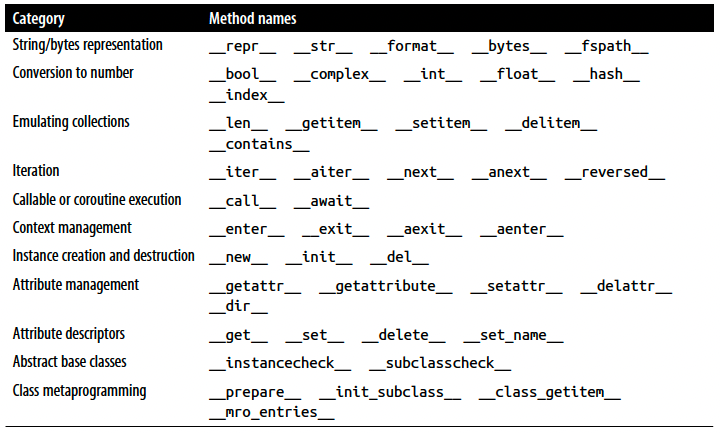

By implementing custom methods for these special functions, one can get their objects to behave like built-in Python types, enabling the powerful expressive coding style for Python. One of the very basic requirements for a Python object is to provide a usable string representation of itself for debugging and logging, this is done as shown with the `__repr__` and `__str__` methods.